In [1]:
import cv2
import matplotlib.pyplot as plt

In [34]:
img1 = cv2.imread('../../data/rainbow.jpg')

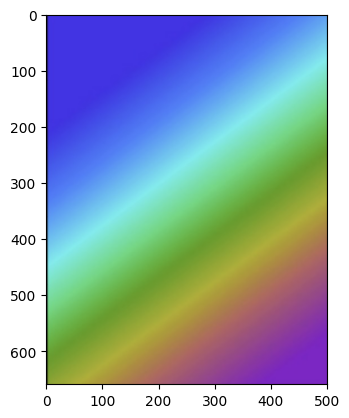

In [35]:
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1);

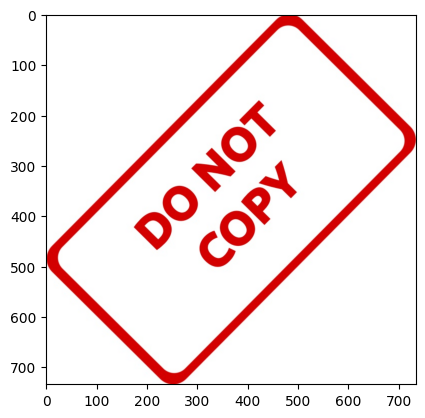

In [5]:
img2 = cv2.imread('../../data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2);


In [6]:
img1.shape,img2.shape

((659, 501, 3), (734, 734, 3))

In [10]:
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img1.shape,img2.shape

((659, 501, 3), (659, 501, 3))

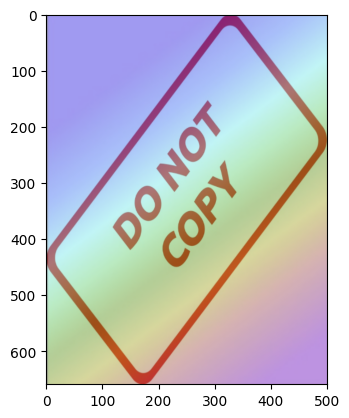

In [12]:
blended = cv2.addWeighted(src1 = img1, alpha=0.5,src2 = img2, beta=0.5, gamma=0)
plt.imshow(blended);

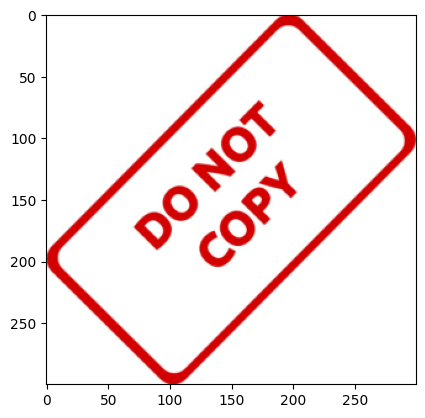

In [19]:
img2 = cv2.resize(img2, (300,300))
plt.imshow(img2);


In [20]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

In [21]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end,x_offset:x_end] = small_img

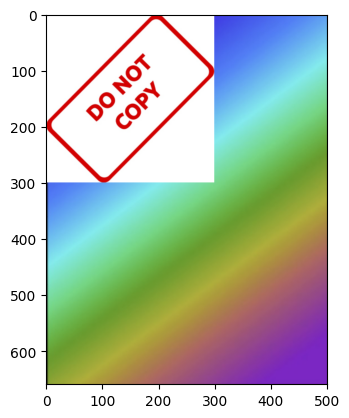

In [22]:
plt.imshow(large_img)

In [23]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]


In [24]:
y_offset,x_offset

(359, 201)

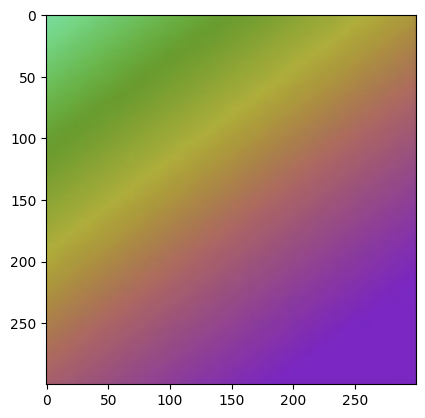

In [25]:
roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[1]]
plt.imshow(roi)

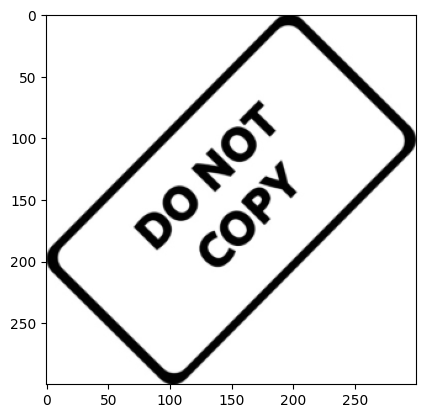

In [27]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray,cmap = 'gray')

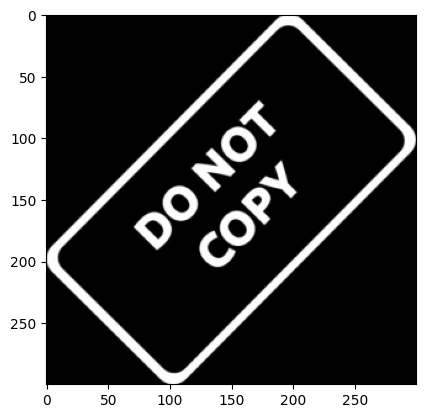

In [28]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv,cmap = 'gray')

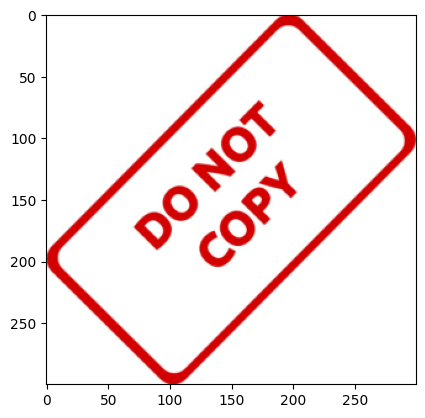

In [29]:
plt.imshow()

In [30]:
fg = cv2.bitwise_or(img2,img2,mask = mask_inv)

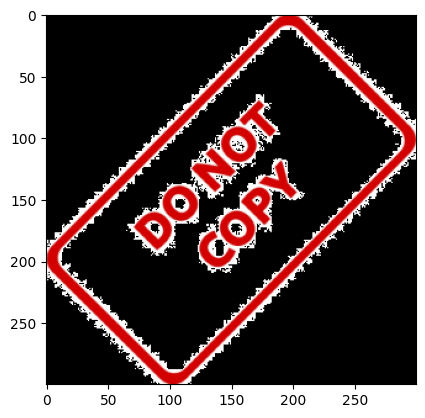

In [31]:
plt.imshow(fg)

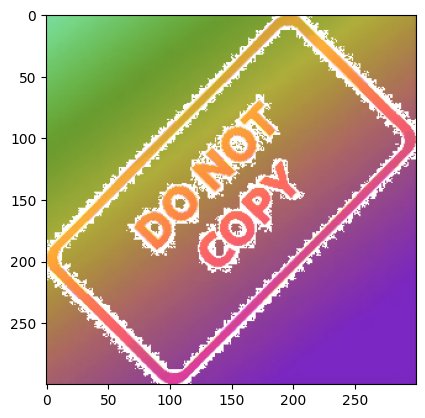

In [32]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi);

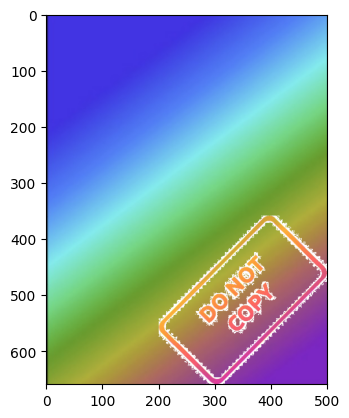

In [36]:
img1[y_offset:y_offset+img2.shape[0],x_offset:x_offset+img2.shape[1]] = final_roi
plt.imshow(img1)

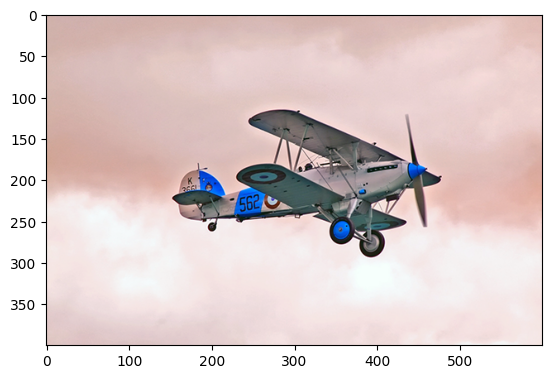

In [38]:
src = cv2.imread('../../data/airplane.bmp',cv2.IMREAD_COLOR)
plt.imshow(src);

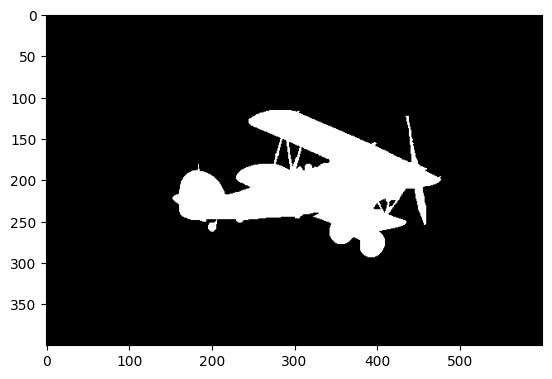

In [40]:
mask = cv2.imread('../../data/mask_plane.bmp',cv2.IMREAD_GRAYSCALE)
plt.imshow(mask, cmap = 'gray');

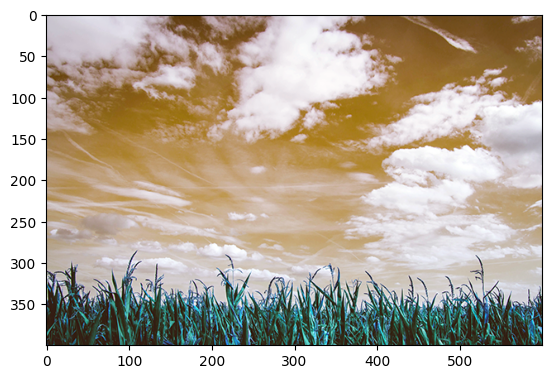

In [42]:
dst = cv2.imread('../../data/field.bmp',cv2.IMREAD_COLOR)
plt.imshow(dst)

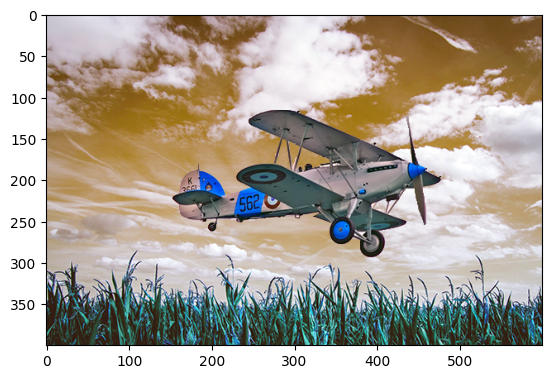

In [43]:
plt.imshow(cv2.copyTo(src, mask, dst))